## Componentes principales
### 1. Inicializacion

In [3]:
# Librerias
# 0. Librerias y Dataset
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Preparando el DF
separador=os.sep
nombreArchivo="diabetes.csv"
archivo=str(os.getcwd())+str(separador)+"datasets"+str(separador)+nombreArchivo
df = pd.read_csv(archivo)

### 2. Matriz de correlacion

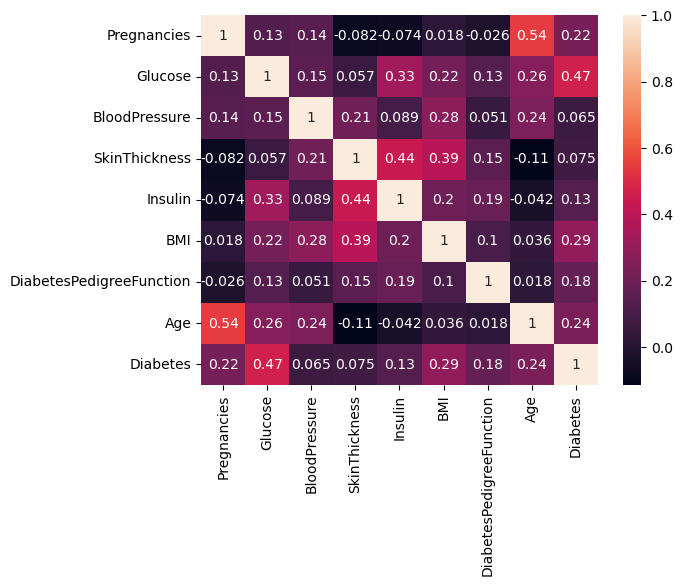

<Figure size 900x600 with 0 Axes>

In [11]:
matriz_correlacion = df.corr()
sns.heatmap(matriz_correlacion, annot = True)
plt.show()
fig=plt.figure(figsize=(9, 6))

Observar que la matriz de correlación es simétrica, por lo tanto, es diagonalizable.

### 2. Analisis de Componentes Principales

In [12]:
# 2.1. Matriz de Covarianza
X = df.iloc[:,0:df.shape[1]-1].values
y = df.iloc[:,df.shape[1]-1].values
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal
X_std = StandardScaler().fit_transform(X)
matriz_covarianza=np.cov(X_std.T)
auto_valores, auto_vectores = np.linalg.eig(matriz_covarianza)
#  Hacemos una lista de parejas (autovector, autovalor) 
auto_pares = [(np.abs(auto_valores[i]), auto_vectores[:,i]) for i in range(len(auto_valores))]
# Ordenamos estas parejas den orden descendiente con la función sort
auto_pares.sort(key=lambda x: x[0], reverse=True)

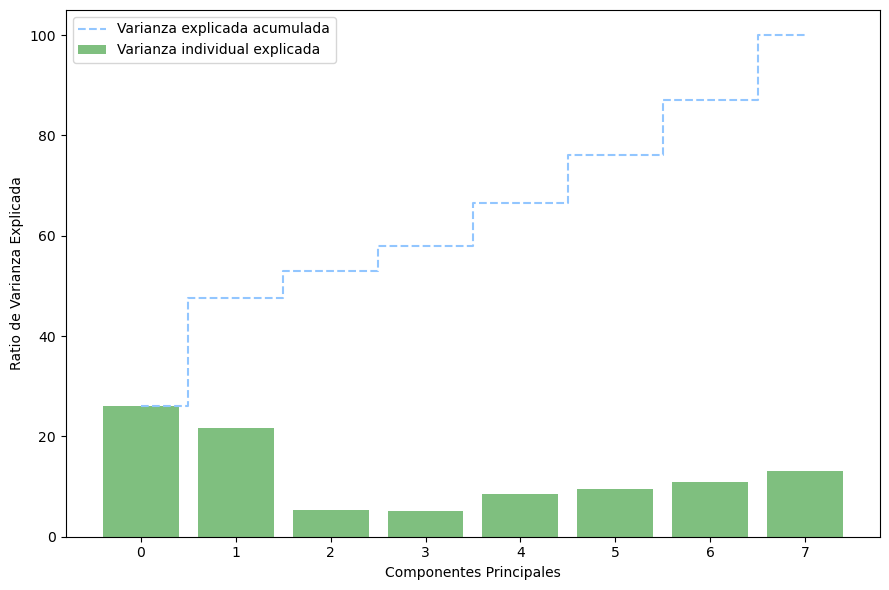

In [13]:
# 2.2. Varianza Explicada:
total = sum(auto_valores)
var_exp = [(i / total)*100 for i in (auto_valores)]# sorted(auto_valores, reverse=True)]
acum_var_exp = np.cumsum(var_exp)
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    fig=plt.figure(figsize=(9, 6))
    plt.bar(range(df.shape[1]-1), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(df.shape[1]-1), acum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()